In [42]:
import pandas as pd

def getTotalAndDictFromDF(df, t):
    df_custom = df[df[t].notna()][['Unnamed: 0', t]]
    total = df_custom[t][0]
    df_custom.loc[:, 'Unnamed: 0'] = df_custom.iloc[1:]['Unnamed: 0'].map(lambda x: x.strftime('%Y-%m-%d'))
    df_custom.loc[:, t] = df_custom.iloc[1:][t].map(lambda x: x / total)
    d = df_custom[1:].set_index('Unnamed: 0', t).to_dict()[t]
    return total, d

df = pd.read_excel('/Users/peiel/PycharmProjects/quantify_data/geektime.xlsx')
spring_total, spring = getTotalAndDictFromDF(df, 'spring')
netty_total, netty = getTotalAndDictFromDF(df, 'netty')
im_total, im = getTotalAndDictFromDF(df, 'im')
construction_total, construction = getTotalAndDictFromDF(df, 'construction')
algo_total, algo = getTotalAndDictFromDF(df, 'algo')

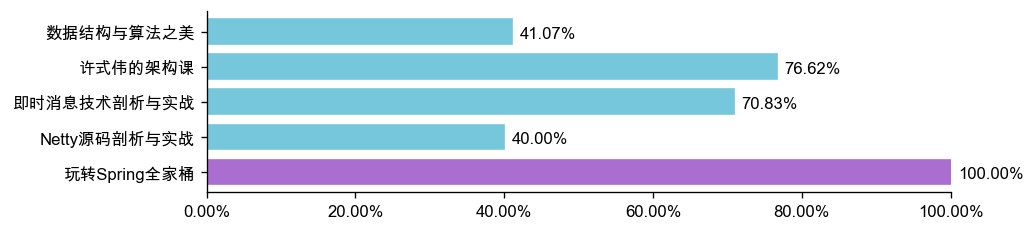

In [43]:
# -*- coding: utf-8 -*-
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

def getStudySchedule(d):
    return list(d.values())[-1] * 100

def resetColor(b):
    w = b.get_width()
    if w < 100:
        b.set_color(r'#76C7DB')
    if w >= 100 and w < 200:
        b.set_color(r'#AA6ED0')
    if w >= 200 and w < 300:
        b.set_color(r'#DF29D3')
    if w >= 300:
        b.set_color(r'#CAAE7C')

def resetWidth(b):
    w = b.get_width()
    if w > 100 and w <= 200:
        b.set_width(w - 100)
    if w > 200 and w <= 300:
        b.set_width(w - 200)
    if w > 300:
        b.set_width(w - 300)

fmt='%.2f%%'

y = ['玩转Spring全家桶', 'Netty源码剖析与实战', '即时消息技术剖析与实战', '许式伟的架构课', '数据结构与算法之美']
width = [getStudySchedule(spring),
         getStudySchedule(netty),
         getStudySchedule(im),
         getStudySchedule(construction),
         getStudySchedule(algo)]

plt.figure(num=1, figsize=(8, 2))
bar_list = plt.barh(y, width, height=0.7, color='b')
for bar in bar_list:
    resetColor(bar)
    resetWidth(bar)
    plt.text(bar.get_width()+1,
             bar.get_y()+0.3,
             fmt % bar.get_width(),
             horizontalalignment='left',
             verticalalignment='center',
             weight='bold')

ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
xticks = mtick.FormatStrFormatter(fmt)
ax.xaxis.set_major_formatter(xticks)

plt.xlim(0,100)
plt.rcParams['savefig.dpi'] = 120 #图片像素
plt.rcParams['figure.dpi'] = 120 #分辨率
plt.show()

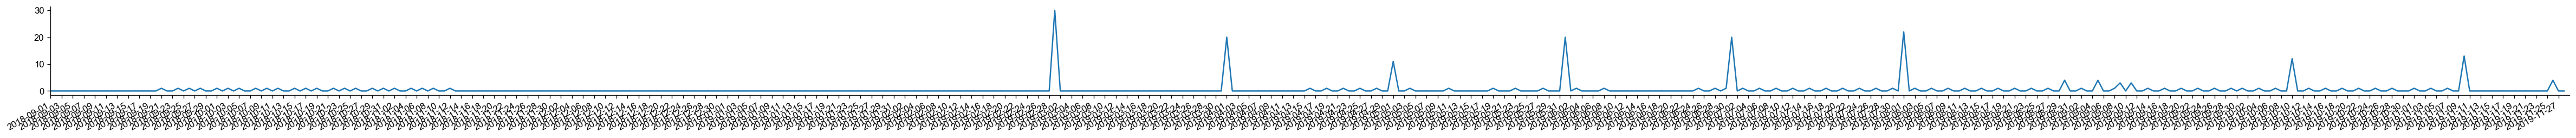

In [40]:
import datetime
import copy
import math
 
def dateRange(beginDate, endDate):
    dates = []
    dt = datetime.datetime.strptime(beginDate, "%Y-%m-%d")
    date = beginDate[:]
    while date <= endDate:
        dates.append(date)
        dt = dt + datetime.timedelta(1)
        date = dt.strftime("%Y-%m-%d")
    return dates

def importData(d_source, d_target, total):
    source_values = list(map(lambda x : math.ceil(x * total),d_target.values()))
    values = copy.deepcopy(source_values)
    for i in range(len(values)):
        if i == 0:
            continue
        values[i] = source_values[i] - source_values[i-1]
    
    i = 0
    for k, v in d_target.items():
        d_source[k] = d_source[k] + values[i]
        i = i + 1


date_array = dateRange('2018-09-01', datetime.datetime.today().strftime('%Y-%m-%d'))
date_dict = dict.fromkeys(date_array, 0)
importData(date_dict, spring, spring_total)
importData(date_dict, netty, netty_total)
importData(date_dict, im, im_total)
importData(date_dict, construction, construction_total)
importData(date_dict, algo, algo_total)

# sum = 0
# for k, v in date_dict.items():
#     sum = sum + v
#     date_dict[k] = sum

plt.figure(num=2, figsize=(50, 2))
plt.plot(list(date_dict.keys()), list(date_dict.values()))

plt.xlim((0,len(list(date_dict.values()))))

ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

plt.gcf().autofmt_xdate()
plt.xticks([x for x in range(len(list(date_dict.values()))) if x % 2 == 0])

plt.show()